In [2]:
import tarfile
from pathlib import Path

tar_path = Path("C:/Users/user/Documents/esophageal_cancer_cv/data/raw/VALSET3_TCGA.tar")
extract_path = Path("C:/Users/user/Documents/esophageal_cancer_cv/data/raw")

with tarfile.open(tar_path) as tar:
    tar.extractall(path=extract_path)

print("Extraction completed")

C:\Users\user\AppData\Local\Temp\ipykernel_17496\1681383577.py:8: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_path)


Extraction completed


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random

In [6]:
data_root = Path("C:/Users/user/Documents/esophageal_cancer_cv/data/raw/VALSET3_TCGA")

In [7]:
class_dirs = sorted([p.name for p in data_root.iterdir() if p.is_dir()])
class_dirs

['ADVENT',
 'LAM_PROP',
 'MUSC_MUC',
 'MUSC_PROP',
 'REGR_TU',
 'SH_MAG',
 'SH_OES',
 'SUBMUC',
 'SUB_GL',
 'TUMOR',
 'ULCUS']

In [8]:
binary_mapping = {
    "TUMOR": 1
}

def get_binary_label(class_name):
    return binary_mapping.get(class_name, 0)

In [9]:
for c in class_dirs:
    print(c, "->", get_binary_label(c))

ADVENT -> 0
LAM_PROP -> 0
MUSC_MUC -> 0
MUSC_PROP -> 0
REGR_TU -> 0
SH_MAG -> 0
SH_OES -> 0
SUBMUC -> 0
SUB_GL -> 0
TUMOR -> 1
ULCUS -> 0


In [10]:
records = []

for class_name in class_dirs:
    class_path = data_root / class_name
    label = get_binary_label(class_name)

    for img_path in class_path.iterdir():
        if img_path.suffix.lower() in [".png", ".jpg", ".jpeg", ".tif", ".tiff"]:
            records.append({
                "image_path": str(img_path),
                "class_name": class_name,
                "label": label
            })

df = pd.DataFrame(records)

In [12]:
df.head()

,image_path,class_name,label
0,C:\Users\user\Documents\esophageal_cancer_cv\d...,ADVENT,0
1,C:\Users\user\Documents\esophageal_cancer_cv\d...,ADVENT,0
2,C:\Users\user\Documents\esophageal_cancer_cv\d...,ADVENT,0
3,C:\Users\user\Documents\esophageal_cancer_cv\d...,ADVENT,0
4,C:\Users\user\Documents\esophageal_cancer_cv\d...,ADVENT,0


In [13]:
print("Total images:", len(df))
print(df["label"].value_counts())

Total images: 32796
label
0    21575
1    11221
Name: count, dtype: int64


In [14]:
df.groupby("class_name").size().sort_values(ascending=False)

class_name
TUMOR        11221
MUSC_PROP     9826
SH_MAG        3488
ADVENT        3013
SUBMUC        2967
SH_OES        1285
MUSC_MUC       409
LAM_PROP       272
ULCUS          205
SUB_GL         110
dtype: int64

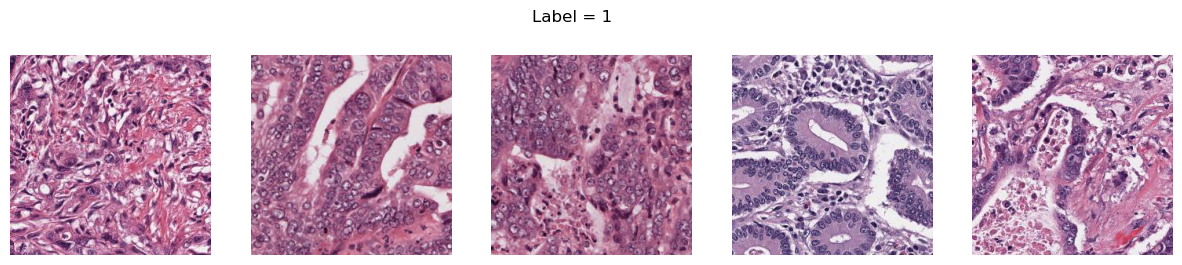

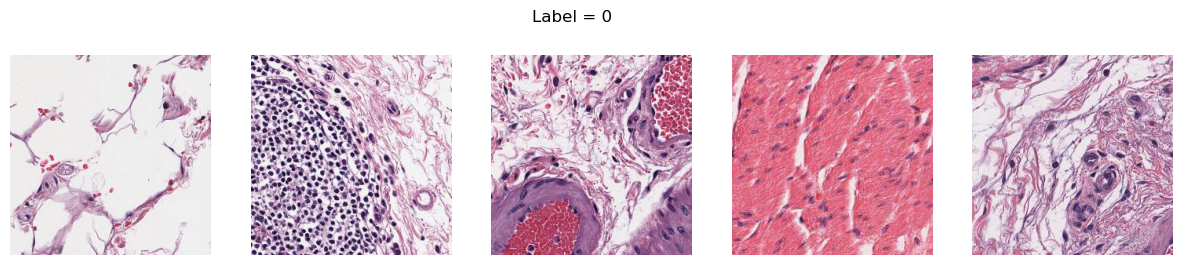

In [15]:
def show_random_samples(df, label, n=5):
    subset = df[df["label"] == label].sample(n)
    plt.figure(figsize=(15, 3))
    for i, row in enumerate(subset.itertuples()):
        img = Image.open(row.image_path)
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(f"Label = {label}")
    plt.show()

show_random_samples(df, label=1)  # TUMOR
show_random_samples(df, label=0)  # NON-TUMOR

In [17]:
Path("C:/Users/user/Documents/esophageal_cancer_cv/data/processed").mkdir(parents=True, exist_ok=True)
df.to_csv("C:/Users/user/Documents/esophageal_cancer_cv/data/processed/metadata.csv", index=False)